## Import necessary libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')

## Step 1 : Data Exploration (EDA)

In [2]:
# Load the dataset
df = pd.read_csv('FastagFraudDetection.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [5]:
# Display basic statistics
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [6]:
# Check for missing values
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

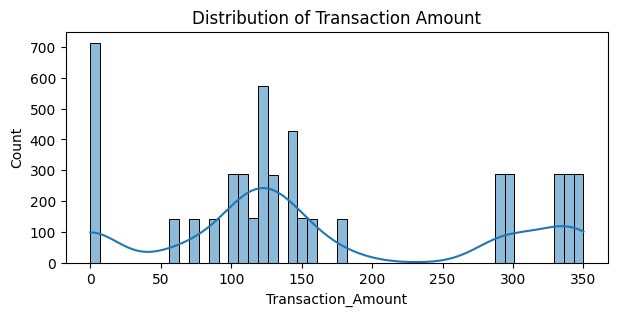

In [7]:
# Plot Distribution of numerical features
plt.figure(figsize=(7,3))
sns.histplot(df['Transaction_Amount'],bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

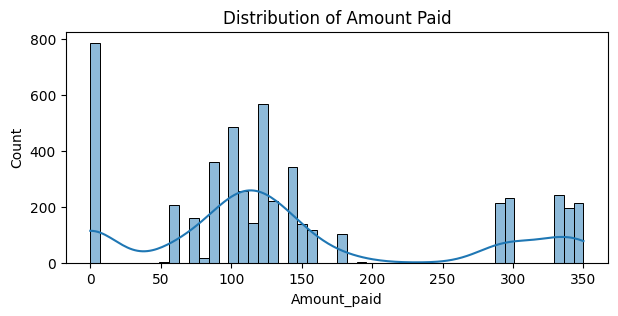

In [8]:
plt.figure(figsize=(7,3))
sns.histplot(df['Amount_paid'],bins=50, kde=True)
plt.title('Distribution of Amount Paid')
plt.show()

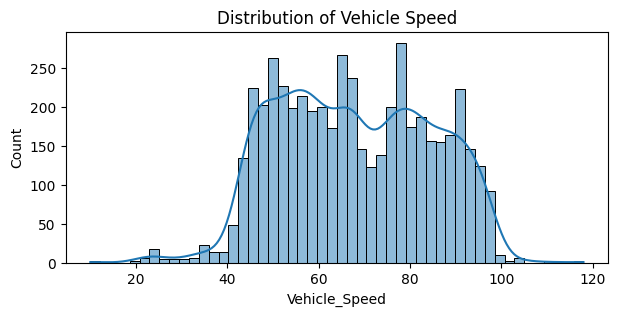

In [9]:
plt.figure(figsize=(7,3))
sns.histplot(df['Vehicle_Speed'],bins=50, kde=True)
plt.title('Distribution of Vehicle Speed')
plt.show()

<Axes: xlabel='Vehicle_Speed', ylabel='Density'>

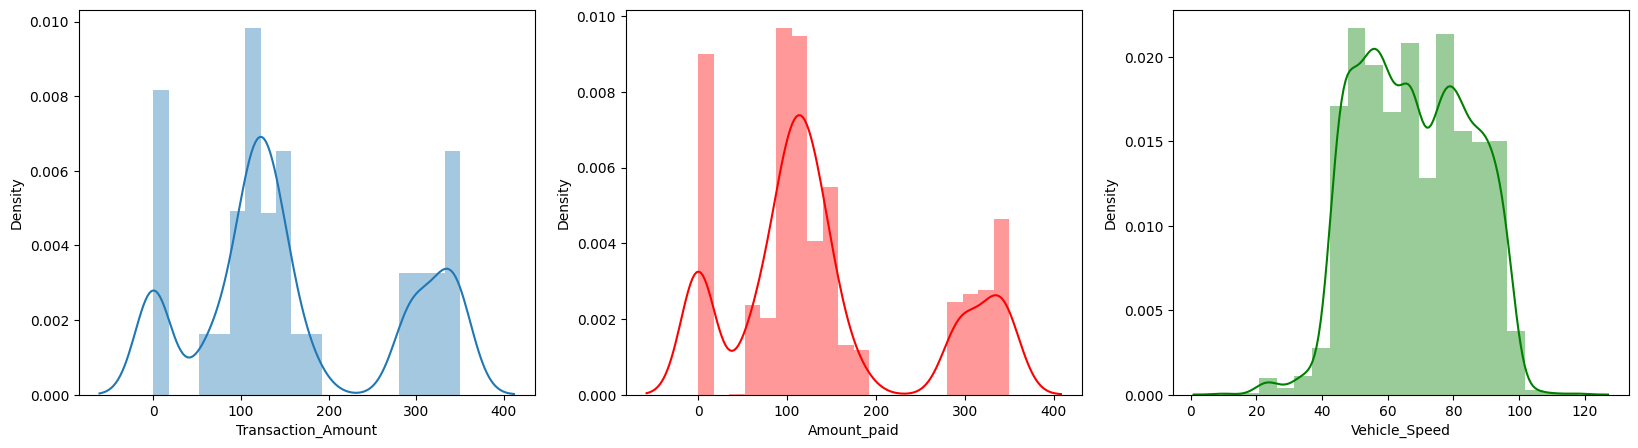

In [10]:
# Display plot of numerical features distribution in 1 row
fig,ax = plt.subplots(1,3, figsize = (20,5))
sns.distplot(df['Transaction_Amount'], bins=20, ax=ax[0])
sns.distplot(df['Amount_paid'], bins=20, ax=ax[1],color="red")
sns.distplot(df['Vehicle_Speed'], bins=20, ax=ax[2],color="green")

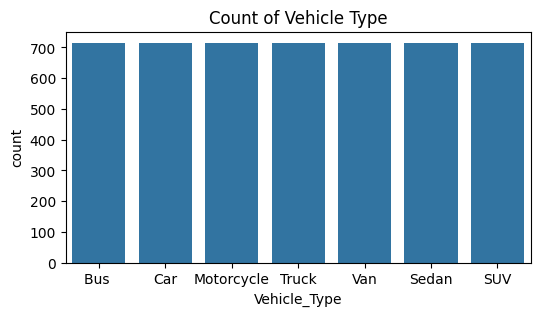

In [11]:
# Plot count of categorical features
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'Vehicle_Type')
plt.title('Count of Vehicle Type')
plt.show()

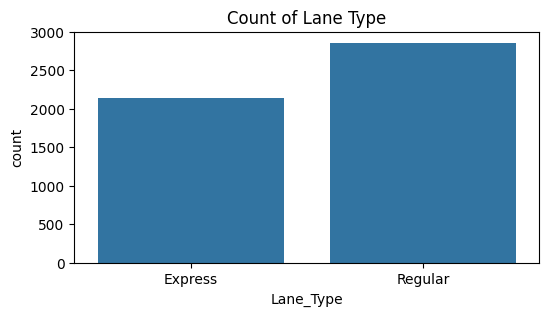

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(data = df, x = 'Lane_Type')
plt.title('Count of Lane Type')
plt.show()

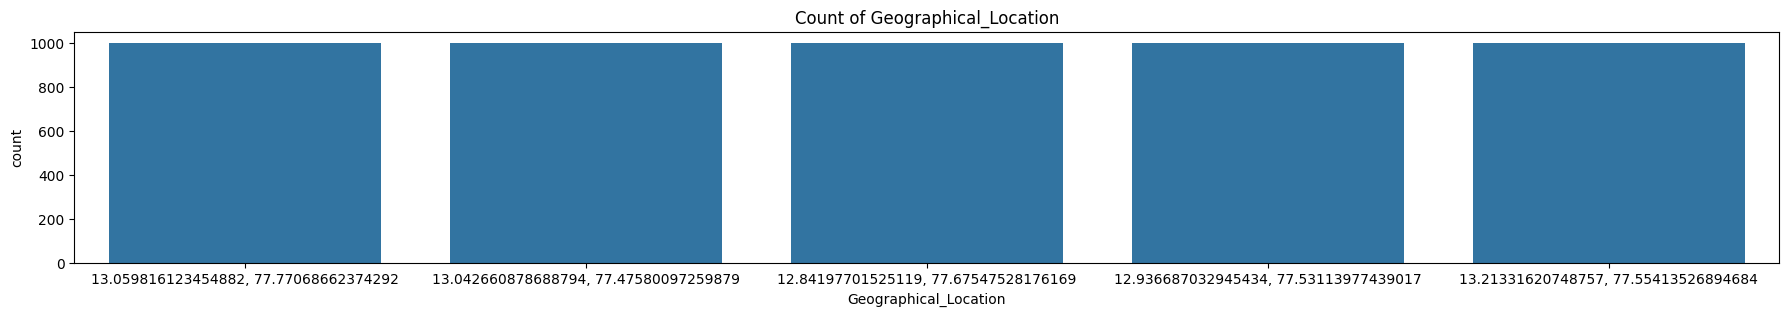

In [13]:
plt.figure(figsize=(22,3))
sns.countplot(data = df, x = 'Geographical_Location')
plt.title('Count of Geographical_Location')
plt.show()

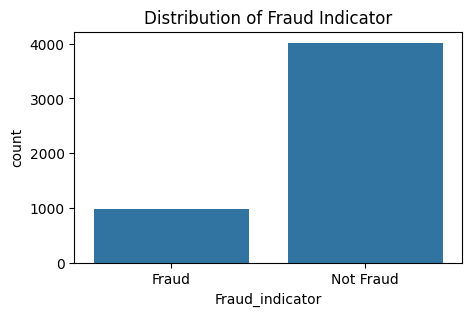

In [14]:
# Plot the distribution of the target variable
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Fraud_indicator')
plt.title('Distribution of Fraud Indicator')
plt.show()

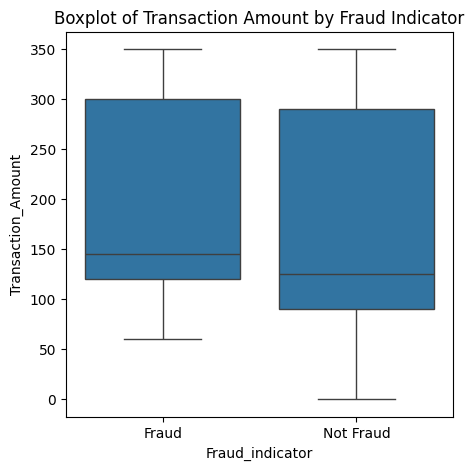

In [15]:
# Checking for outliers
plt.figure(figsize=(5, 5))
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=df)
plt.title('Boxplot of Transaction Amount by Fraud Indicator')
plt.show()

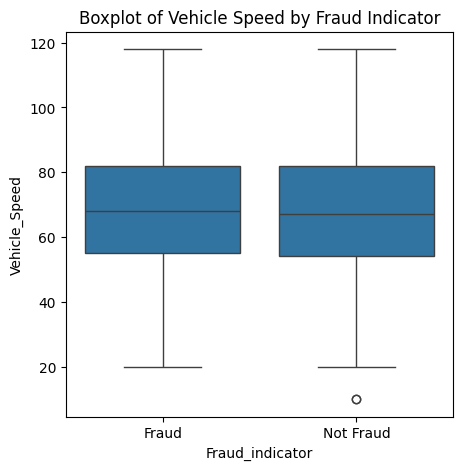

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Fraud_indicator', y='Vehicle_Speed', data=df)
plt.title('Boxplot of Vehicle Speed by Fraud Indicator')
plt.show()

In [17]:
# Print the proportion of fraudulent transactions
frand_proporation = df['Fraud_indicator'].value_counts(normalize=True)
frand_proporation

Fraud_indicator
Not Fraud    0.8034
Fraud        0.1966
Name: proportion, dtype: float64

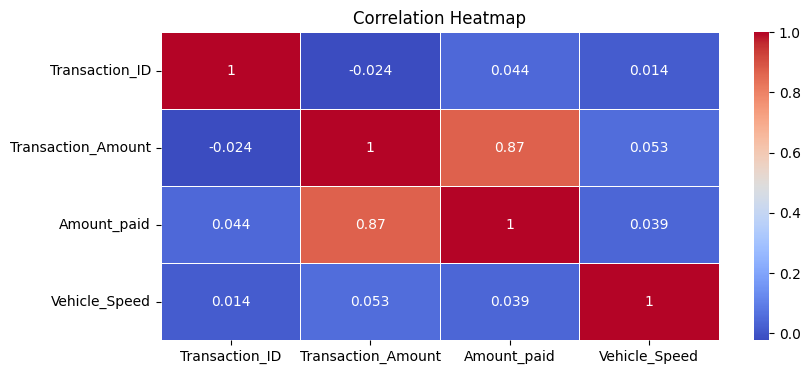

In [18]:
# Plot the heatmap
plt.figure(figsize=(9, 4))
numeric = df.select_dtypes(include=['int64', 'float64'])
corr_df = numeric.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Step 2 : Data Preprocessing 

In [19]:
df.isna().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [20]:
df['FastagID'].unique()

array(['FTG-001-ABC-121', 'FTG-002-XYZ-451', nan, ..., 'FTG-447-PLN-109',
       'FTG-458-VFR-876', 'FTG-459-WSX-543'], dtype=object)

In [21]:
df['FastagID'].fillna("Unknown", inplace=True)

In [22]:
df.isna().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

## Step 3 : Feature Engineering

In [23]:
# Convert Timestamp to datetime and extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [24]:
df['High_Transaction_Flag'] = df['Transaction_Amount'] > 1000

In [25]:
df['Amount_per_Speed'] = df['Transaction_Amount'] / df['Vehicle_Speed']

In [26]:
df['Transaction_difference'] = df['Transaction_Amount'] - df['Amount_paid']

In [27]:
# Encoding categorical features

# one-hot encoding
Vechical_df = pd.get_dummies(df['Vehicle_Type'], prefix='Vechical_Type', drop_first=True, dtype=int)
df.drop("Vehicle_Type", axis=1, inplace=True)
df = pd.concat([df, Vechical_df], axis=1)
df.head()

,Transaction_ID,Timestamp,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,...,Month,High_Transaction_Flag,Amount_per_Speed,Transaction_difference,Vechical_Type_Car,Vechical_Type_Motorcycle,Vechical_Type_SUV,Vechical_Type_Sedan,Vechical_Type_Truck,Vechical_Type_Van
0,1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,...,1,False,5.384615,230,0,0,0,0,0,0
1,2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,...,1,False,1.538462,20,1,0,0,0,0,0
2,3,2023-01-08 18:25:00,Unknown,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,...,1,False,0.000000,0,0,1,0,0,0,0
3,4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,...,1,False,3.804348,230,0,0,0,0,1,0
4,5,2023-01-10 06:35:00,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,...,1,False,2.333333,40,0,0,0,0,0,1


In [28]:
# Label-encoding
df['Lane_Type'].replace({'Express' : 0, 'Regular' : 1},inplace=True)
df['Lane_Type'].value_counts()

Lane_Type
1    2858
0    2142
Name: count, dtype: int64

In [29]:
# one-hot encoding
geo_df = pd.get_dummies(df['Geographical_Location'], dtype=int, prefix='Geographical_Location', drop_first=True)
df.drop('Geographical_Location', axis=1, inplace=True)
df = pd.concat([df, geo_df],axis=1)
df.head()

,Transaction_ID,Timestamp,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Vehicle_Plate_Number,...,Vechical_Type_Car,Vechical_Type_Motorcycle,Vechical_Type_SUV,Vechical_Type_Sedan,Vechical_Type_Truck,Vechical_Type_Van,"Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684"
0,1,2023-01-06 11:20:00,FTG-001-ABC-121,A-101,0,Large,350,120,65,KA11AB1234,...,0,0,0,0,0,0,0,0,1,0
1,2,2023-01-07 14:55:00,FTG-002-XYZ-451,B-102,1,Small,120,100,78,KA66CD5678,...,1,0,0,0,0,0,0,0,1,0
2,3,2023-01-08 18:25:00,Unknown,D-104,1,Small,0,0,53,KA88EF9012,...,0,1,0,0,0,0,0,0,1,0
3,4,2023-01-09 02:05:00,FTG-044-LMN-322,C-103,1,Large,350,120,92,KA11GH3456,...,0,0,0,0,1,0,0,0,1,0
4,5,2023-01-10 06:35:00,FTG-505-DEF-652,B-102,0,Medium,140,100,60,KA44IJ6789,...,0,0,0,0,0,1,0,0,1,0


In [30]:
# Label-encoding
df['Fraud_indicator'].replace({'Fraud' : 1, 'Not Fraud' : 0},inplace=True)
df['Fraud_indicator'].value_counts()

Fraud_indicator
0    4017
1     983
Name: count, dtype: int64

In [31]:
# Label-encoding
df["Vehicle_Dimensions"].replace({'Large' : 2, 'Small' : 0, 'Medium' : 1},inplace=True)
df['Vehicle_Dimensions'].value_counts()

Vehicle_Dimensions
2    2144
0    1428
1    1428
Name: count, dtype: int64

In [32]:
# Standardize numerical features
scaler = StandardScaler()
df[['Transaction_Amount','Amount_paid','Vehicle_Speed','Transaction_difference']] = scaler.fit_transform(df[['Transaction_Amount','Amount_paid','Vehicle_Speed','Transaction_difference']]) 

## Step 4 : Model Development

In [33]:
# Define features and target variable
X = df.drop(columns=['Transaction_ID', 'Timestamp', 'Fraud_indicator', 'Vehicle_Plate_Number', 'FastagID', 'TollBoothID'])
y = df['Fraud_indicator']

In [34]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [36]:
# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

In [37]:
# Train and evaluate multiple models
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)
]

In [38]:
# Store evaluation results
results = []
for model in models:
    result = evaluate_model(model, X_train_smote, y_train_smote, X_test, y_test)
    results.append(result)
    print("\n")

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       803
           1       1.00      0.91      0.95       197

    accuracy                           0.98      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.98      0.98      0.98      1000

[[803   0]
 [ 18 179]]


Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       197

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

[[803   0]
 [  0 197]]


Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      0.99      1.00       197

    accuracy                           1.00   

In [39]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                        Model  Accuracy  Precision    Recall  F1 Score
0          LogisticRegression     0.982        1.0  0.908629  0.952128
1      DecisionTreeClassifier     1.000        1.0  1.000000  1.000000
2      RandomForestClassifier     0.999        1.0  0.994924  0.997455
3  GradientBoostingClassifier     1.000        1.0  1.000000  1.000000
4               XGBClassifier     1.000        1.0  1.000000  1.000000


In [40]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

## Step 5 : Explanatory Analysis

In [41]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

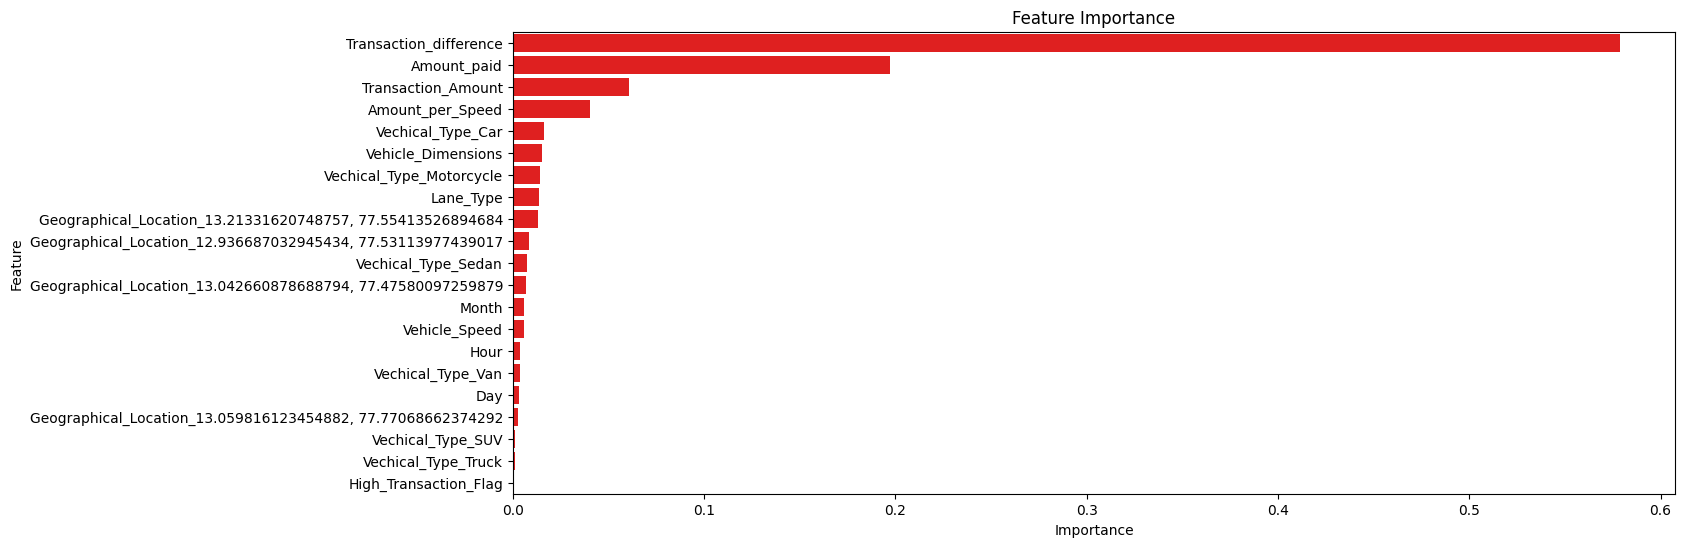

In [42]:
# Plot feature importance
plt.figure(figsize=(15,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='red')
plt.title('Feature Importance')
plt.show()

## Testing Model With user input

In [43]:
user_data_input = pd.DataFrame(X_test.iloc[1])
di = user_data_input.to_dict().values()
user_data_pd = pd.DataFrame(di)
user_data_pd

,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Hour,Day,Month,High_Transaction_Flag,Amount_per_Speed,...,Vechical_Type_Car,Vechical_Type_Motorcycle,Vechical_Type_SUV,Vechical_Type_Sedan,Vechical_Type_Truck,Vechical_Type_Van,"Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684"
0,1,2,1.680364,1.960536,0.912804,1,9,12,False,4.216867,...,0,0,0,0,1,0,0,0,1,0


In [44]:
best_model.predict(user_data_pd)[0]

0

In [45]:
y_test.iloc[1]

0

In [46]:
# Save the best model
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [47]:
# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [48]:
# Save the column names
with open('columns.pkl', 'wb') as columns_file:
    pickle.dump(X.columns.tolist(), columns_file)